## Libraries

In [1]:
import numpy as np
import math
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.linalg import inv

## 1

In [2]:
def logistic(x1,x2):
    p=1/(1+math.exp(-(0.1+1.1*x1-0.9*x2)))
    return p


In [3]:
X10=np.random.uniform(-2, 2, (10, 2))
logistic10 = [logistic(row[0], row[1]) for row in X10]
y10=np.random.binomial(1,logistic10)
np.bincount(y10)

array([3, 7], dtype=int64)

In [4]:
X50=np.random.uniform(-2, 2, (50, 2))
logistic50 = [logistic(row[0], row[1]) for row in X50]
y50=np.random.binomial(1,logistic50)
np.bincount(y50)

array([16, 34], dtype=int64)

In [5]:
X100=np.random.uniform(-2, 2, (100, 2))
logistic100 = [logistic(row[0], row[1]) for row in X100]
y100=np.random.binomial(1,logistic100)
np.bincount(y100)

array([46, 54], dtype=int64)

## 2

### functions

In [6]:
def log_likelihood(b, X, y):
    p = 1 / (1 + np.exp(-(b[0] + b[1] * X[:, 0] + b[2] * X[:, 1])))
    return np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))

proposal_betas = np.random.multivariate_normal([0,0,0], 1.5*np.identity(3), size=20000)

def beta_approx(X,y):
    log_weights = []
    for b in proposal_betas:
        log_weight = log_likelihood(b, X, y) +(-0.5 * np.sum(b ** 2) - 1.5 * np.log(2 * np.pi)) - multivariate_normal([0,0,0],2*np.identity(3)).logpdf(b)
        log_weights.append(log_weight)
        
    log_weights = np.array(log_weights)
    log_weights_max = np.max(log_weights)
    weights = np.exp(log_weights - log_weights_max)
    normalized_weights = weights / np.sum(weights)
    approximations = np.sum(proposal_betas.T * normalized_weights, axis=1)

    return(normalized_weights,approximations)


In [7]:
def compute_error_estimates(proposal_betas, normalized_weights, approximations):
    standard_errors = []
    for j in range(proposal_betas.shape[1]):  
        mean_j = approximations[j]
        variance_j = np.sum(normalized_weights * (proposal_betas[:, j] - mean_j) ** 2)
        standard_errors.append(np.sqrt(variance_j)) 
    return standard_errors


### size 10

In [8]:
nweights10,_=beta_approx(X10,y10)
_,beta10=beta_approx(X10,y10)
print(beta10)

[ 0.77376653 -0.23676069  0.15676274]


In [9]:
standard_errors10 = compute_error_estimates(proposal_betas, nweights10, beta10)
print(standard_errors10)
print(np.sum(nweights10) ** 2 / np.sum(nweights10 ** 2))

[0.635792524675597, 0.5526520438713102, 0.5227386060492066]
3154.2064738505146


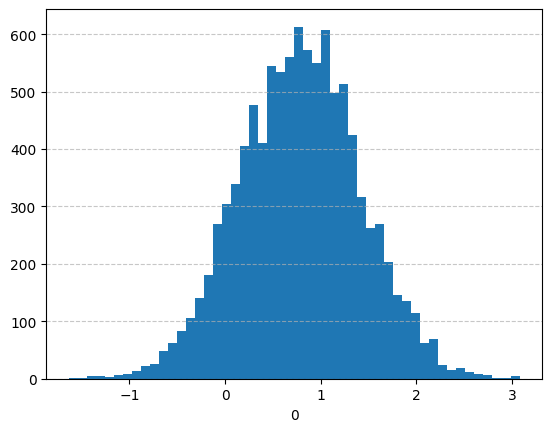

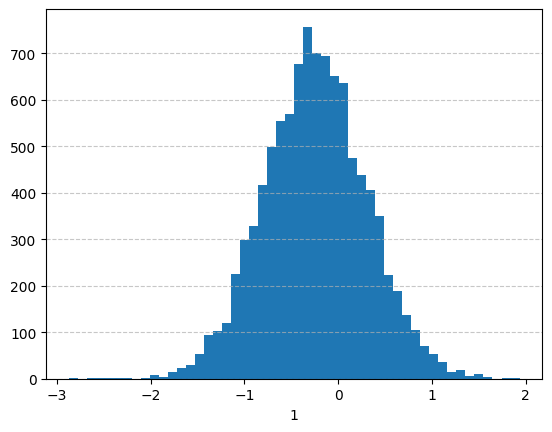

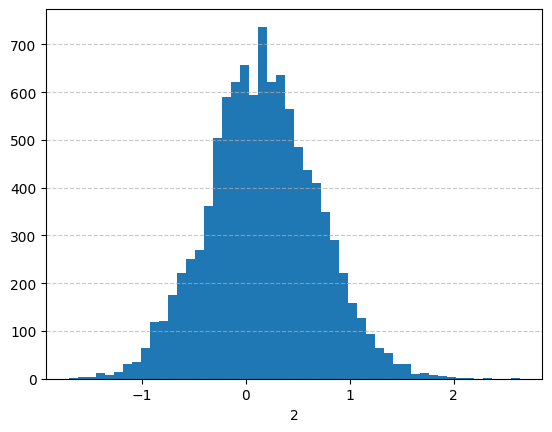

In [10]:
indices10 = np.random.choice(len(proposal_betas), size=10000, p=nweights10)
resamples10 = proposal_betas[indices10]
param_names = [0,1,2]
for j in range(resamples10.shape[1]):
    plt.figure()
    plt.hist(resamples10[:, j],bins=50)
    plt.xlabel(param_names[j])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

### size 50

In [11]:
nweights50,_=beta_approx(X50,y50)
_,beta50=beta_approx(X50,y50)
print(beta50)


[ 0.89746063  1.4435652  -1.00283426]


In [12]:
standard_errors50 = compute_error_estimates(proposal_betas, nweights50, beta50)
print(standard_errors50)
print(np.sum(nweights50) ** 2 / np.sum(nweights50 ** 2))

[0.38427139955083134, 0.38576588011549967, 0.37354367886888745]
371.60023304942695


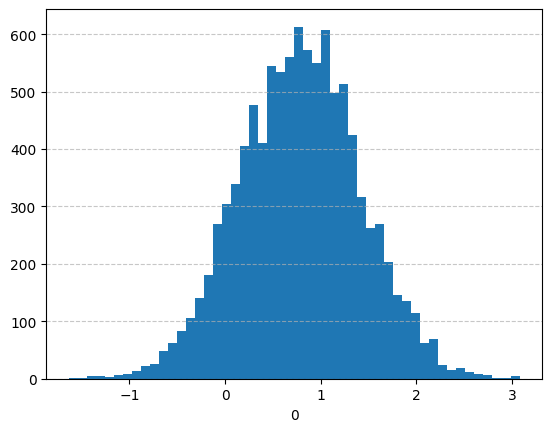

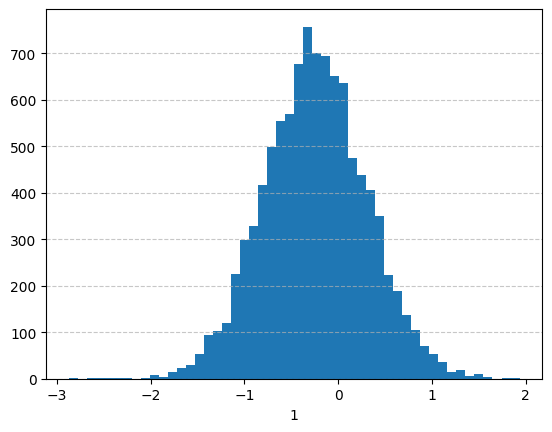

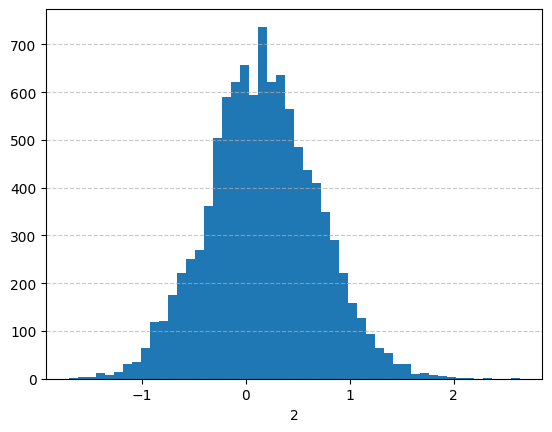

In [13]:
indices50 = np.random.choice(len(proposal_betas), size=10000, p=nweights50)
resamples50 = proposal_betas[indices50]
param_names = [0,1,2]
for j in range(resamples50.shape[1]):
    plt.figure()
    plt.hist(resamples10[:, j],bins=50)
    plt.xlabel(param_names[j])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

### size 100

In [14]:
nweights100,_=beta_approx(X100,y100)
_,beta100=beta_approx(X100,y100)
print(beta100)

[ 0.21063819  1.0114387  -0.93131542]


In [15]:
standard_errors100 = compute_error_estimates(proposal_betas, nweights100, beta100)
print(standard_errors100)
print(np.sum(nweights100) ** 2 / np.sum(nweights100 ** 2))

[0.24106645146258843, 0.22942511933927176, 0.22689679024053888]
178.82540044610053


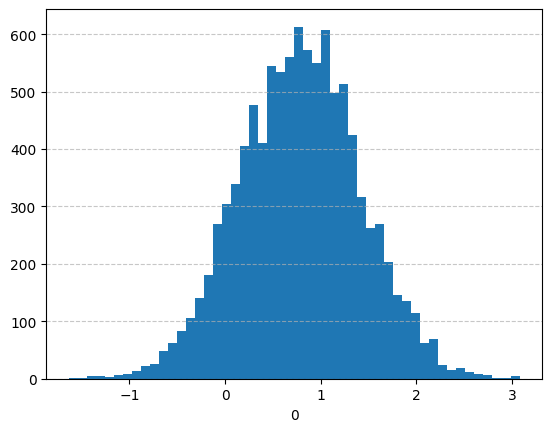

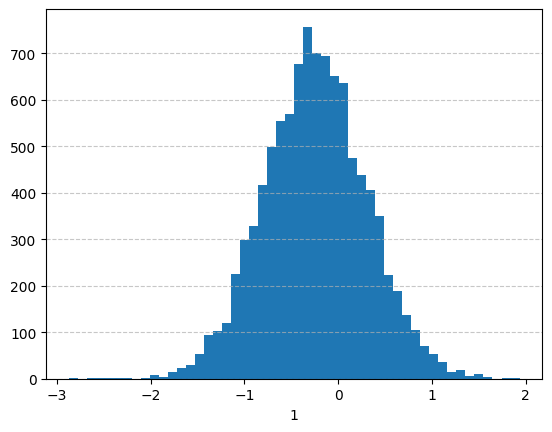

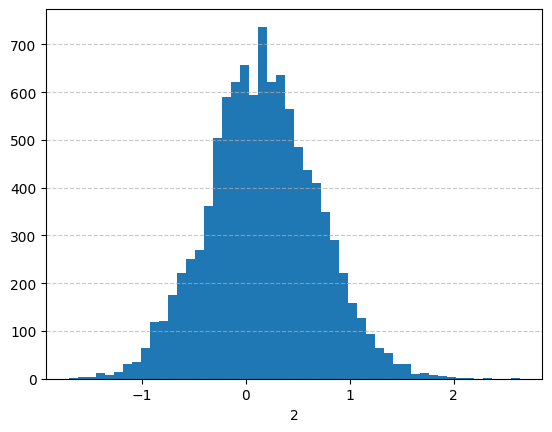

In [16]:
indices100 = np.random.choice(len(proposal_betas), size=10000, p=nweights100)
resamples100 = proposal_betas[indices100]
param_names = [0,1,2]
for j in range(resamples100.shape[1]):
    plt.figure()
    plt.hist(resamples10[:, j],bins=50)
    plt.xlabel(param_names[j])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

### Standard Optimizer

In [17]:
def negative_log_posterior(b, X, y):
    p = 1 / (1 + np.exp(-(b[0] + b[1] * X[:, 0] + b[2] * X[:, 1])))
    log_likelihood = np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))
    log_prior = -0.5 * np.sum(b ** 2) - 1.5 * np.log(2 * np.pi)
    return -(log_likelihood + log_prior)

result = minimize(negative_log_posterior, [0,0,0], args=(X100, y100), method='BFGS')
beta_optimizer = result.x
print(beta_optimizer)


[ 0.21350534  0.98690121 -0.92313988]


## 3

### functions

In [18]:
def make_data(n):
    X = np.random.uniform(-2, 2, (n, 8)) 
    fixed = np.array([0.1, 1.1, -0.9])  
    rand = np.random.uniform(-1, 1, 6)  
    betas = np.concatenate([fixed, rand])
    X = np.hstack([np.ones((n, 1)), X])  
    p = 1 / (1 + np.exp(-np.dot(X, betas)))  
    y = np.random.binomial(1, p)  
    return X, y, betas

def log_like(b, X, y):
    p = 1 / (1 + np.exp(-np.dot(X, b)))
    return np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))


def approx(X, y):
    prop = np.random.multivariate_normal(np.zeros(9), 1.5 * np.identity(9), size=20000)
    log_w = []
    for b in prop:
        lp = -0.5 * np.sum(b**2)  
        lq = multivariate_normal(np.zeros(9), 1.5 * np.identity(9)).logpdf(b)
        log_w.append(log_like(b, X, y) + lp - lq)
    log_w = np.array(log_w)
    log_w_max = np.max(log_w)
    w = np.exp(log_w - log_w_max)
    nw = w / np.sum(w)  
    means = np.sum(prop.T * nw, axis=1)  
    return nw, means, prop

def get_errors(prop, nw, means):
    se = []
    for j in range(prop.shape[1]):
        var = np.sum(nw * (prop[:, j] - means[j]) ** 2)
        se.append(np.sqrt(var))
    return se
def get_ess(nw):
    return (np.sum(nw) ** 2) / np.sum(nw ** 2)

def myplot(r, m):
    fig, axs = plt.subplots(3, 3, figsize=(12, 8))  
    axs = axs.flatten()  
    for j in range(r.shape[1]):
        axs[j].hist(r[:, j], bins=30, alpha=0.7, color="blue", edgecolor="black")
        axs[j].axvline(m[j], color="red", linestyle="--")
    plt.tight_layout()
    plt.show()



### 10

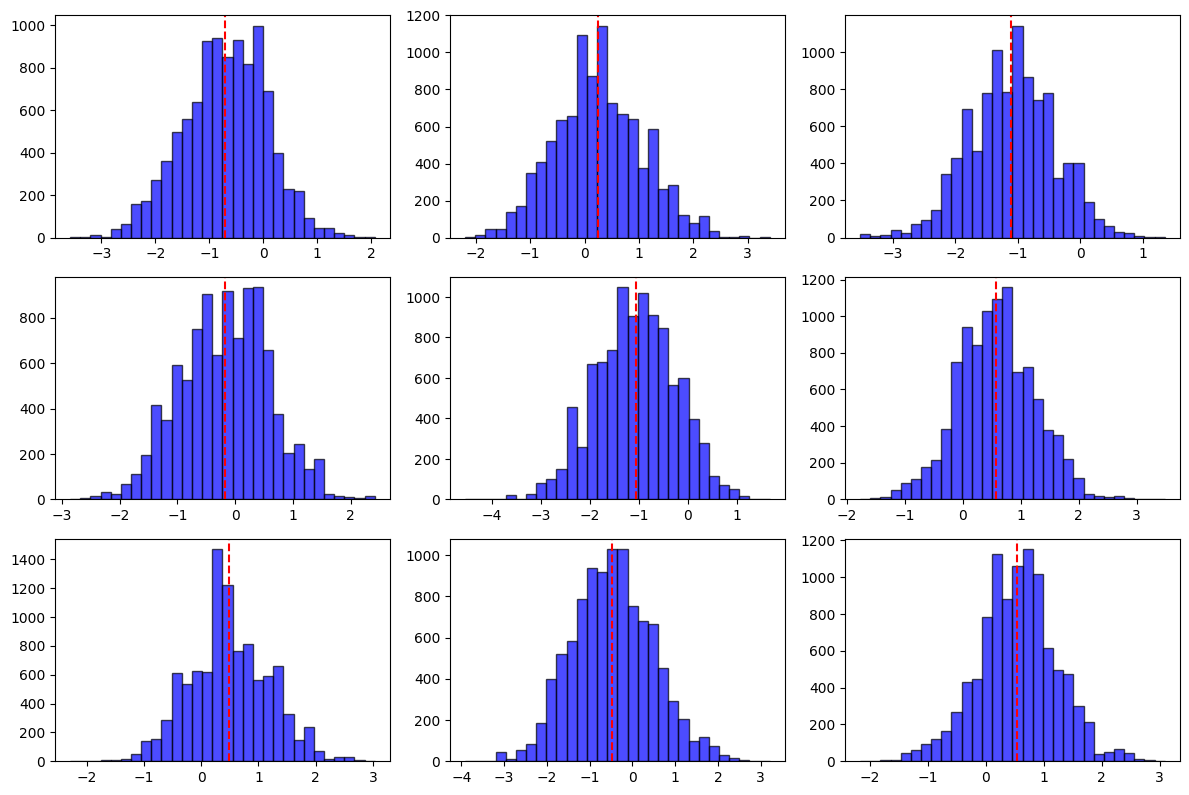

realbetas: [ 0.1         1.1        -0.9        -0.47910093 -0.97638798  0.11872287
  0.34408732 -0.73055859  0.23846918]
means: [-0.7100372   0.2462845  -1.11528443 -0.17487718 -1.05673605  0.58017989
  0.49289553 -0.48478199  0.53474958]
errors: [0.77185244201315, 0.8006303646222298, 0.6844805428496971, 0.7683996488989462, 0.8244350894506903, 0.6676439630730189, 0.6955622844443675, 0.9377282939164222, 0.6792046049335554]
ess 396.99870718851696


In [19]:
X10, y10, true_betas10 = make_data(10)

nw10, means10, resamp_prop10 = approx(X10, y10)

errs10 = get_errors(resamp_prop10, nw10, means10)

ess10 = get_ess(nw10)

idx10 = np.random.choice(len(resamp_prop10), size=10000, p=nw10)
resamp10 = resamp_prop10[idx10]
myplot(resamp10, means10)

print("realbetas:", true_betas10)
print("means:", means10)
print("errors:", errs10)
print("ess", ess10)

### 50

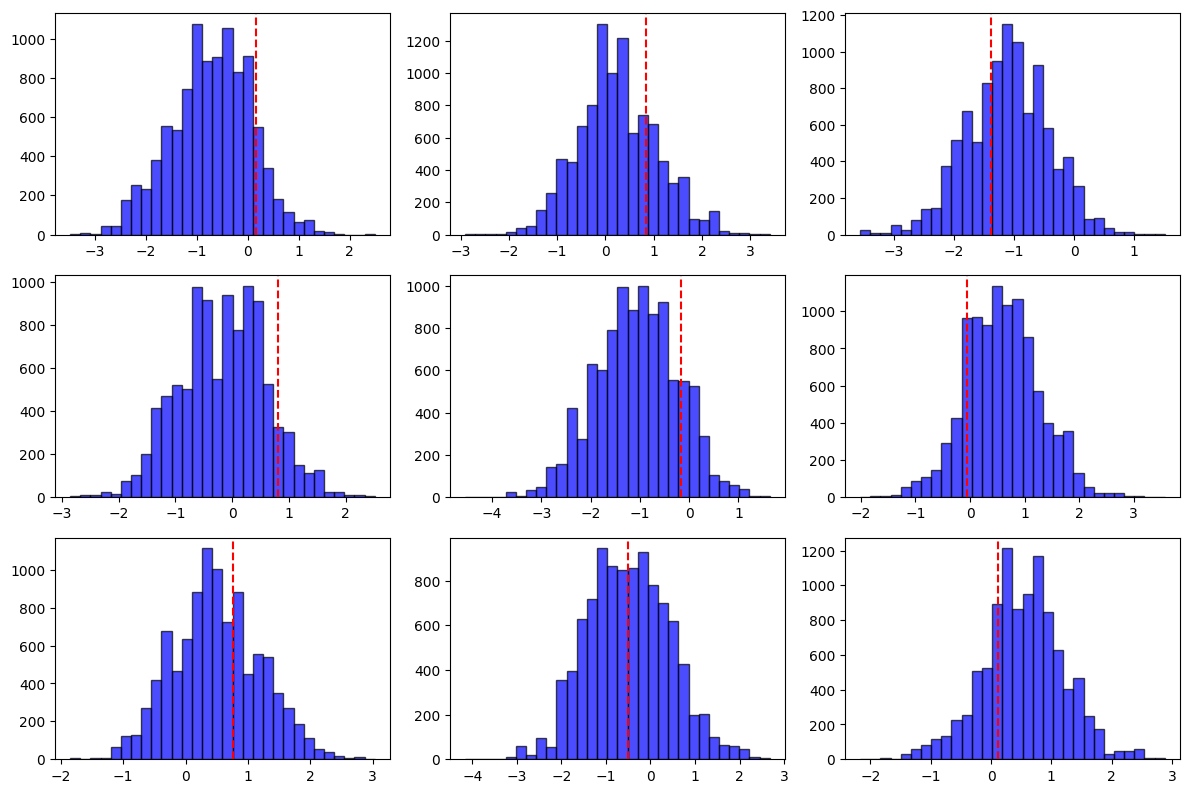

realbetas: [ 0.1         1.1        -0.9         0.72634259 -0.52622002 -0.26017359
  0.74434856 -0.81328278  0.06832214]
means: [ 0.16165553  0.84943099 -1.38867454  0.80400911 -0.17420655 -0.05575066
  0.76681956 -0.51409475  0.11896543]
errors: [0.41062405938644314, 0.21439651345793606, 0.29666396004421514, 0.38329656132118023, 0.23175388820838466, 0.21643050491348614, 0.31790561238882414, 0.40957355740792983, 0.3153387581032277]
ess 2.453056315955572


In [20]:
X50, y50, true_betas50 = make_data(50)

nw50, means50, resamp_prop50 = approx(X50, y50)

errs50 = get_errors(resamp_prop50, nw50, means50)

ess50 = get_ess(nw50)

idx50 = np.random.choice(len(resamp_prop50), size=10000, p=nw10)
resamp50 = resamp_prop10[idx50]
myplot(resamp50, means50)

print("realbetas:", true_betas50)
print("means:", means50)
print("errors:", errs50)
print("ess", ess50)


### 100

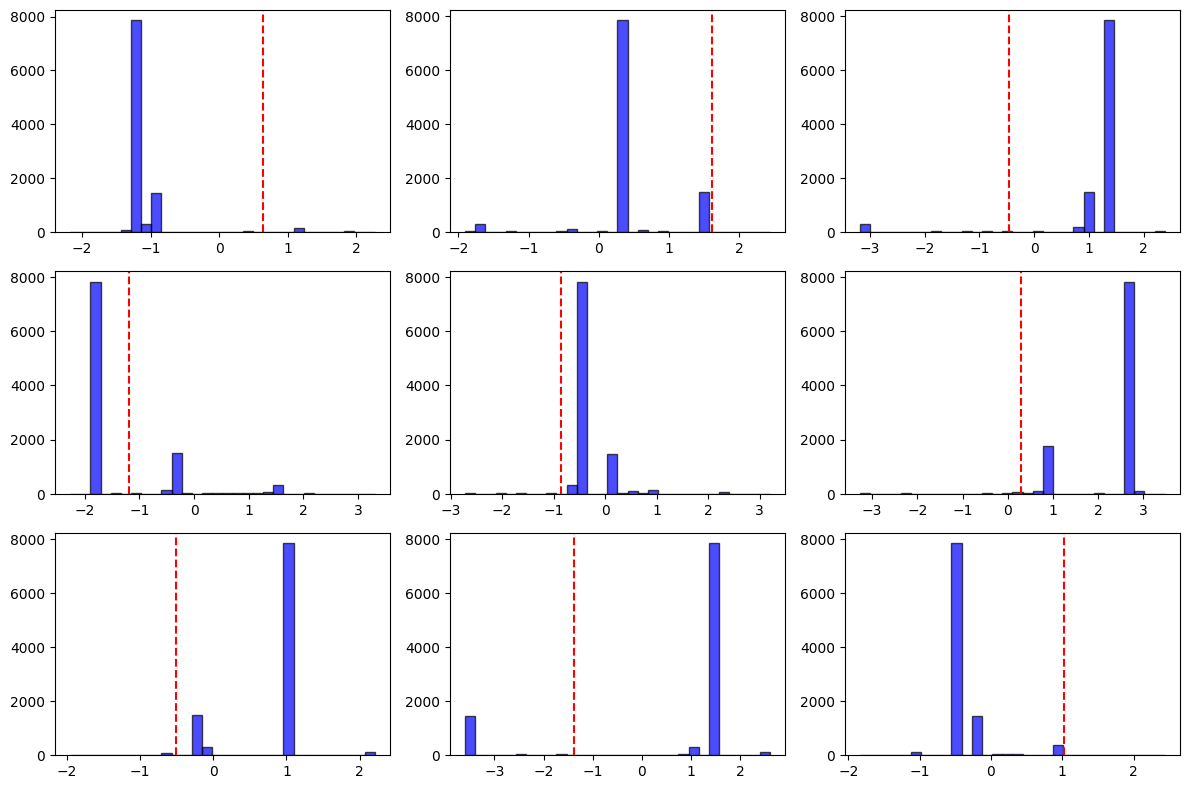

realbetas: [ 0.1         1.1        -0.9        -0.67689618 -0.04424954 -0.19122363
 -0.30818029 -0.91143682  0.73550793]
means: [ 0.63481704  1.61384215 -0.46453509 -1.19152258 -0.84900708  0.28670852
 -0.51523833 -1.38583441  1.0293015 ]
errors: [1.8103745724911673, 1.3796915809116468, 1.7270620542364858, 0.8836806074172601, 0.6689380589441498, 2.1519543353087216, 1.417773059987496, 2.786613171788582, 1.4290393586333006]
ess 1.5852878783687072


In [21]:
X100, y100, true_betas100 = make_data(100)

nw100, means100, resamp_prop100 = approx(X100, y100)

errs100 = get_errors(resamp_prop10, nw100, means100)

ess100 = get_ess(nw100)

idx100 = np.random.choice(len(resamp_prop100), size=10000, p=nw100)
resamp100 = resamp_prop10[idx100]
myplot(resamp100, means100)

print("realbetas:", true_betas100)
print("means:", means100)
print("errors:", errs100)
print("ess", ess100)


## 4

### functions

In [33]:
def log_posterior(beta, X, y):
    p = 1 / (1 + np.exp(-np.dot(X, beta)))  
    log_likelihood = np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))  
    log_prior = -0.5 * np.sum(beta**2)  
    return -(log_likelihood + log_prior)  

init_beta = np.zeros(9)

def mode_finder(X,y):
    result = minimize(log_posterior, init_beta, args=(X, y), method='BFGS')
    posterior_mode = result.x
    return posterior_mode







In [23]:

def approx(X, y, prop_center, prop_cov):
    prop = np.random.multivariate_normal(prop_center, prop_cov, size=20000)
    log_w = []
    
    for b in prop:
        lp = -0.5 * np.sum(b**2)  
        lq = multivariate_normal(prop_center, prop_cov).logpdf(b)        
        p = 1 / (1 + np.exp(-np.dot(X, b)))
        log_likelihood = np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))        
        log_w.append(log_likelihood + lp - lq)
    
    log_w = np.array(log_w)
    log_w_max = np.max(log_w)
    w = np.exp(log_w - log_w_max)
    nw = w / np.sum(w)  
    
    means = np.sum(prop.T * nw, axis=1)  
    return nw, means, prop


### size=10

In [25]:
modX10,mody10,modtruebeta10=make_data(10)
posterior_mode10=mode_finder(modX10,mody10)
modnw10, modmeans10, modresamp_prop10 = approx(modX10, mody10, posterior_mode10, 1.5 * np.identity(9))
modess10 = (np.sum(modnw10) ** 2) / np.sum(modnw10 ** 2)

print("real betas:", modtruebeta10)
print("mode:", posterior_mode10)
print("means:", modmeans10)
print("ess:", modess10)



real betas: [ 0.1         1.1        -0.9         0.83824021  0.66417368  0.48746847
  0.11640136  0.42878297 -0.81133231]
mode: [ 0.4613541  -0.09165817 -0.81564802  0.45526147  0.20217338  0.8415913
 -0.03067938 -0.11993487 -0.76275089]
means: [ 0.50460074 -0.16310522 -1.11916491  0.60989463  0.25083901  1.0287038
 -0.07233887 -0.16402906 -0.93673479]
ess: 1230.8340406072632


### size=50

In [27]:
modX50,mody50,modtruebeta50=make_data(50)
posterior_mode50=mode_finder(modX50,mody50)
modnw50, modmeans50, modresamp_prop50 = approx(modX50, mody50, posterior_mode50, 1.5 * np.identity(9))
modess50 = (np.sum(modnw50) ** 2) / np.sum(modnw50 ** 2)

print("real betas:", modtruebeta50)
print("mode:", posterior_mode50)
print("means:", modmeans50)
print("ess:", modess50)


real betas: [ 0.1         1.1        -0.9         0.73092229  0.76704348  0.78390548
  0.62868504 -0.32475914  0.00115151]
mode: [-0.10784229  0.12486287 -0.44905265  0.25233649  0.50726648  0.37504446
  0.46764377 -0.52744199 -0.21098923]
means: [-0.0483061   0.07684541 -0.47612323  0.4057788   0.57516574  0.64180666
  0.76371304 -0.64491109 -0.15310577]
ess: 10.837581989176288


### size=100

In [30]:
modX100,mody100,modtruebeta100=make_data(100)
posterior_mode100=mode_finder(modX100,mody100)
modnw100, modmeans100, modresamp_prop100 = approx(modX100, mody100, posterior_mode100, 1.5 * np.identity(9))
modess100 = (np.sum(modnw100) ** 2) / np.sum(modnw100 ** 2)

print("real betas:", modtruebeta100)
print("mode:", posterior_mode100)
print("means:", modmeans100)
print("ess:", modess100)


real betas: [ 0.1         1.1        -0.9         0.6521963  -0.41877353 -0.39600222
 -0.03233502 -0.53472388 -0.53922717]
mode: [-0.07740516  1.26942008 -0.99057131  1.21250606 -0.35154291 -1.09413492
  0.14441206 -0.68314231 -0.51516891]
means: [-0.21304998  1.45575035 -1.51786119  1.51408698 -0.31418541 -1.11228178
  0.11216688 -1.16367204 -0.4429814 ]
ess: 6.386771595528261


## 5

In [ ]:
X100, y100, true_betas100 = make_data(100)

init_beta_100 = np.zeros(9)

result_100 = minimize(log_posterior, init_beta_100, args=(X100, y100), method='L-BFGS-B')
posterior_mode_100 = result_100.x
hess_inv_100 = result_100.hess_inv.todense()  


In [42]:
covnw100, covmeans100, covresamp100 = approx(X100, y100, posterior_mode_100, hess_inv_100)

covess100 = get_ess(covnw100)


print("means", covmeans100)
print("ess:", covess100)


means [-0.16733309  0.64755756 -0.60238661 -0.2013684   0.66181229  0.26984593
 -0.89294385  0.16528248  0.06103172]
ess: 61.57002910500564


In [43]:
X50, y50, true_betas50 = make_data(50)

init_beta_50 = np.zeros(9)

result_50 = minimize(log_posterior, init_beta_50, args=(X50, y50), method='L-BFGS-B')
posterior_mode_50 = result_50.x
hess_inv_50 = result_50.hess_inv.todense()  

covnw50, covmeans50, covresamp50 = approx(X50, y50, posterior_mode_50, hess_inv_50)

covess50=get_ess(covnw50)


print("means", covmeans50)
print("ess:", covess50)



means [ 0.40863585  1.07146259 -0.28217032 -0.75197269  0.80899014  0.35722443
  0.19712742 -0.01382323  1.28529998]
ess: 471.5501202614671
